## This notebook holds the final preprocessing steps for the dataset and the baseline model.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np

from Olympic_PED_use.src import functions as fn

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.impute import MissingIndicator, SimpleImputer, KNNImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from datetime import datetime
import six
import pandas.util.testing as tm
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('../data/model_df.csv')

#### I merged all the results from the 2012 and 2016 Games to the athlete dataframe, before modeling I need to combine the values in the results columns to one final column.

In [4]:
df

,id,name,sex,age,height,weight,team,noc,year,season,...,result_5000m_womens_rio,result_5000m_womens_london,result_800m_mens_rio,result_800m_mens_london,result_800m_womens_rio,result_800m_womens_london,result_discus_mens_rio,result_discus_mens_london,result_discus_womens_rio,result_discus_womens_london
0,34,jamale jamale,M,30.0,187.0,76.0,France,FRA,2012,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,antonio beci,M,26.0,170.0,65.0,Spain,ESP,2016,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67,mariya abakumova,F,26.0,179.0,80.0,Russia,RUS,2012,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91,emanuele abate,M,27.0,190.0,80.0,Italy,ITA,2012,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,emanuele abate,M,27.0,190.0,80.0,Italy,ITA,2012,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,135477,vaida sinait,F,28.0,167.0,50.0,Lithuania,LTU,2016,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5236,135547,viktoriya zyabkina,F,19.0,174.0,62.0,Kazakhstan,KAZ,2012,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5237,135547,viktoriya zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5238,135547,viktoriya zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016,Summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

id                                   0
name                                 0
sex                                  0
age                                  0
height                             142
weight                             138
team                                 0
noc                                  0
year                                 0
season                               0
city                                 0
sport                                0
event_x                              0
medal                             4758
event_y                           5156
substance                         5156
flagged                           5156
result                            5215
result_100m_mens_london           5085
result_100m_womens_rio            5225
result_100m_womens_london         5132
result_200m_mens_rio              5216
result_200m_mens_london           5148
result_200m_womens_rio            5232
result_200m_womens_london         5169
result_110h_mens_rio     

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
len(df.columns)

56

#### Inserting column "ped_use" to hold the combined result values. I am filling the column with 0 for now

In [8]:
df.insert(56, 'ped_use', 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240 entries, 0 to 5239
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            5240 non-null   object 
 1   sex                             5240 non-null   object 
 2   age                             5240 non-null   float64
 3   height                          5098 non-null   float64
 4   weight                          5102 non-null   float64
 5   team                            5240 non-null   object 
 6   noc                             5240 non-null   object 
 7   year                            5240 non-null   int64  
 8   season                          5240 non-null   object 
 9   city                            5240 non-null   object 
 10  sport                           5240 non-null   object 
 11  event_x                         5240 non-null   object 
 12  medal                           48

In [10]:
df.isna().sum()

name                                 0
sex                                  0
age                                  0
height                             142
weight                             138
team                                 0
noc                                  0
year                                 0
season                               0
city                                 0
sport                                0
event_x                              0
medal                             4758
event_y                           5156
substance                         5156
flagged                           5156
result                            5215
result_100m_mens_london           5085
result_100m_womens_rio            5225
result_100m_womens_london         5132
result_200m_mens_rio              5216
result_200m_mens_london           5148
result_200m_womens_rio            5232
result_200m_womens_london         5169
result_110h_mens_rio              5225
result_110h_mens_london  

In [11]:
results = df[['flagged', 'result', 'result_100m_mens_london',
       'result_100m_womens_rio', 'result_100m_womens_london',
       'result_200m_mens_rio', 'result_200m_mens_london',
       'result_200m_womens_rio', 'result_200m_womens_london',
       'result_110h_mens_rio', 'result_110h_mens_london',
       'result_100h_womens_rio', 'result_100h_womens_london',
       'result_3000steep_mens_rio', 'result_3000steep_mens_london',
       'result_3000steep_womens_rio', 'result_3000steep_womens_london',
       'result_marathon_mens_rio', 'result_marathon_mens_london',
       'result_marathon_womens_rio', 'result_marathon_womens_london',
       'result_20km_mens_rio', 'result_20km_mens_london',
       'result_20km_womens_rio', 'result_20km_womens_london',
       'result_400m_mens_rio', 'result_400m_mens_london',
       'result_400m_womens_rio', 'result_400m_womens_london',
       'result_5000m_mens_rio', 'result_5000m_mens_london',
       'result_5000m_womens_rio', 'result_5000m_womens_london',
       'result_800m_mens_rio', 'result_800m_mens_london',
       'result_800m_womens_rio', 'result_800m_womens_london',
       'result_discus_mens_rio', 'result_discus_mens_london',
       'result_discus_womens_rio', 'result_discus_womens_london']]

In [12]:
results

,flagged,result,result_100m_mens_london,result_100m_womens_rio,result_100m_womens_london,result_200m_mens_rio,result_200m_mens_london,result_200m_womens_rio,result_200m_womens_london,result_110h_mens_rio,...,result_5000m_womens_rio,result_5000m_womens_london,result_800m_mens_rio,result_800m_mens_london,result_800m_womens_rio,result_800m_womens_london,result_discus_mens_rio,result_discus_mens_london,result_discus_womens_rio,result_discus_womens_london
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for x in df[['flagged', 'result', 'result_100m_mens_london',
       'result_100m_womens_rio', 'result_100m_womens_london',
       'result_200m_mens_rio', 'result_200m_mens_london',
       'result_200m_womens_rio', 'result_200m_womens_london',
       'result_110h_mens_rio', 'result_110h_mens_london',
       'result_100h_womens_rio', 'result_100h_womens_london',
       'result_3000steep_mens_rio', 'result_3000steep_mens_london',
       'result_3000steep_womens_rio', 'result_3000steep_womens_london',
       'result_marathon_mens_rio', 'result_marathon_mens_london',
       'result_marathon_womens_rio', 'result_marathon_womens_london',
       'result_20km_mens_rio', 'result_20km_mens_london',
       'result_20km_womens_rio', 'result_20km_womens_london',
       'result_400m_mens_rio', 'result_400m_mens_london',
       'result_400m_womens_rio', 'result_400m_womens_london',
       'result_5000m_mens_rio', 'result_5000m_mens_london',
       'result_5000m_womens_rio', 'result_5000m_womens_london',
       'result_800m_mens_rio', 'result_800m_mens_london',
       'result_800m_womens_rio', 'result_800m_womens_london',
       'result_discus_mens_rio', 'result_discus_mens_london',
       'result_discus_womens_rio', 'result_discus_womens_london']]:
    df[x] = df[x].fillna(value=0.0)

#### Filling the na values in the flagged column with zero for athletes that have not been found guilty of using PED's


In [14]:
df.flagged = df.flagged.fillna(value=0)

In [16]:
results.ped_use = results[list(results.columns)].sum(axis=1)

/opt/anaconda3/envs/olympic-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [17]:
df.ped_use = results.ped_use

In [18]:
df.isna().sum()

name                                 0
sex                                  0
age                                  0
height                             142
weight                             138
team                                 0
noc                                  0
year                                 0
season                               0
city                                 0
sport                                0
event_x                              0
medal                             4758
event_y                           5156
substance                         5156
flagged                              0
result                               0
result_100m_mens_london              0
result_100m_womens_rio               0
result_100m_womens_london            0
result_200m_mens_rio                 0
result_200m_mens_london              0
result_200m_womens_rio               0
result_200m_womens_london            0
result_110h_mens_rio                 0
result_110h_mens_london  

#### Renaming the 'ped_use' column to 'results'

In [19]:
df.rename(columns={'ped_use':'results'}, inplace=True)

In [20]:
df = df.drop(['result', 'result_100m_mens_london',
   'result_100m_womens_rio', 'result_100m_womens_london',
   'result_200m_mens_rio', 'result_200m_mens_london',
   'result_200m_womens_rio', 'result_200m_womens_london',
   'result_110h_mens_rio', 'result_110h_mens_london',
   'result_100h_womens_rio', 'result_100h_womens_london',
   'result_3000steep_mens_rio', 'result_3000steep_mens_london',
   'result_3000steep_womens_rio', 'result_3000steep_womens_london',
   'result_marathon_mens_rio', 'result_marathon_mens_london',
   'result_marathon_womens_rio', 'result_marathon_womens_london',
   'result_20km_mens_rio', 'result_20km_mens_london',
   'result_20km_womens_rio', 'result_20km_womens_london',
   'result_400m_mens_rio', 'result_400m_mens_london',
   'result_400m_womens_rio', 'result_400m_womens_london',
   'result_5000m_mens_rio', 'result_5000m_mens_london',
   'result_5000m_womens_rio', 'result_5000m_womens_london',
   'result_800m_mens_rio', 'result_800m_mens_london',
   'result_800m_womens_rio', 'result_800m_womens_london',
   'result_discus_mens_rio', 'result_discus_mens_london',
   'result_discus_womens_rio', 'result_discus_womens_london'], axis=1)

#### This dataset only has 84 positive doping athletes and 5,156 non-doping athletes. This is a significant class imbalance, I intend on adding in the results from the 2004 and 2008 games as well. I am going to move forward with the two years I have now for a baseline model.

In [54]:
pivot_flagged = df.pivot_table(index='flagged', values='results', aggfunc='count')

In [72]:
pivot_flagged

,results
flagged,
0.0,5156
1.0,84


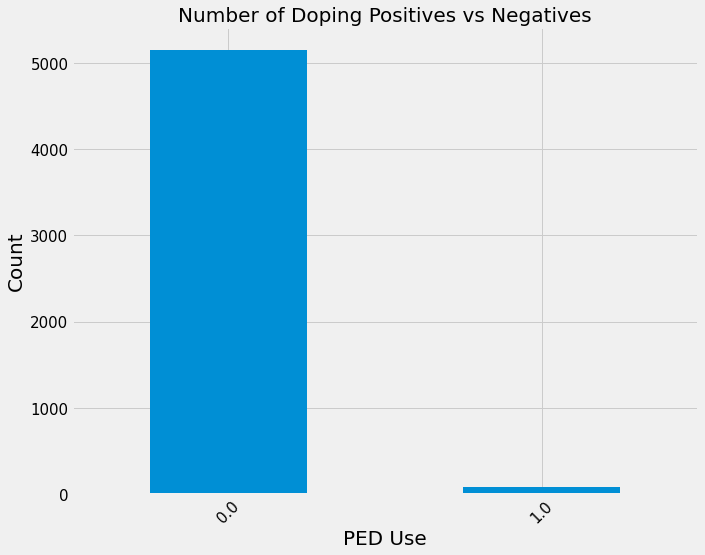

In [99]:
plt.style.use('fivethirtyeight')
plt.figure.figsize=(10,8)
pivot_flagged.plot(kind='bar', figsize=(10,8), fontsize=15, rot=45)
plt.xlabel('PED Use', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Number of Doping Positives vs Negatives', fontsize=20)
plt.legend().remove()
plt.savefig('doping_pos_vs_neg.png', bbox_inches='tight', transparent=True)

In [22]:
df.substance = df.substance.fillna(value='None')

In [23]:
df.substance.value_counts()

None                                                                           5156
4-Methyl-2-hexanamine                                                            14
Metenolone                                                                        8
Cannabis                                                                          6
EPO                                                                               4
Testosterone                                                                      4
Biological passport                                                               4
Refusal to submit to doping control, Tampering with test                          4
Methylhexaneamine                                                                 4
Nandrolone                                                                        3
Hydrochlorothiazide                                                               3
Levmetamfetamine                                                            

In [24]:
df = df.drop(['substance', 'event_y', 'name'], axis=1)

In [25]:
df.medal = df.medal.fillna(value=0)

In [26]:
df.isna().sum()

sex          0
age          0
height     142
weight     138
team         0
noc          0
year         0
season       0
city         0
sport        0
event_x      0
medal        0
flagged      0
results      0
dtype: int64

#### Filling the missing values in the height and weight columns by adding the corresponding previous and proceeding values, and dividing by 2.

In [27]:
df.height = df.height.fillna(value=0)

In [28]:
df.height = df.height.replace(to_replace=0, value=np.nan)

In [29]:
df.height = (df.height.fillna(method='ffill') + df.height.fillna(method='bfill')/2)

In [30]:
df.height.min()

217.5

In [31]:
df.weight = (df.weight.fillna(method='ffill') + df.weight.fillna(method='bfill')/2)

In [32]:
df.isna().sum()

sex        0
age        0
height     0
weight     0
team       0
noc        0
year       0
season     0
city       0
sport      0
event_x    0
medal      0
flagged    0
results    0
dtype: int64

In [33]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'team', 'noc', 'year', 'season',
       'city', 'sport', 'event_x', 'medal', 'flagged', 'results'],
      dtype='object')

#### Changing the 'medal' column features to numeric values

In [34]:
medal_numeric = {0: 0,
                 'Bronze': 1,
                 'Silver': 2,
                 'Gold': 3}
df['medal'] = df.medal.replace(medal_numeric)

In [35]:
df.medal.value_counts()

0    4758
3     166
2     165
1     151
Name: medal, dtype: int64

Performing train test split with random state of 42 for reproducibility 

In [36]:
X = df.drop('flagged', axis=1)
y = df.flagged
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.21)

#### Defining numerical and categorical features for scaling and one hot encoding

In [37]:
cont_features = ['age', 'height', 'weight', 'results']
cat_features = ['sex', 'team', 'noc', 'season', 'city', 'sport',
                       'event_x', 'medal']

#### Scaling and encoding features and combining them for final processed dataframe

In [38]:
X_train_cont = X_train[cont_features].astype(float)
X_train_cat = X_train[cat_features]
X_test_cont = X_test[cont_features].astype(float)
X_test_cat = X_test[cat_features]

X_train_index = X_train.index
X_test_index = X_test.index

ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_cont), 
                              columns=X_train[cont_features].columns, 
                              index=X_train_index)
X_test_scaled = pd.DataFrame(ss.transform(X_test_cont), 
                             columns=X_test[cont_features].columns, 
                             index=X_test_index)
ohe = OneHotEncoder()
X_train_encoded = ohe.fit_transform(X_train_cat)
X_test_encoded = ohe.transform(X_test_cat)

train_columns = ohe.get_feature_names(input_features=X_train_cat.columns)
test_columns = ohe.get_feature_names(input_features=X_test_cat.columns)

X_train_processed = pd.DataFrame(X_train_encoded.todense(), columns=train_columns, index=X_train_index)
X_test_processed = pd.DataFrame(X_test_encoded.todense(), columns=test_columns, index=X_test_index)

In [39]:
X_train_all = pd.concat([X_train_scaled, X_train_processed], axis=1)
X_test_all = pd.concat([X_test_scaled, X_test_processed], axis=1)

In [52]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True, fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    4.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.3s finished


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1079
         1.0       1.00      0.27      0.43        22

    accuracy                           0.99      1101
   macro avg       0.99      0.64      0.71      1101
weighted avg       0.99      0.99      0.98      1101

Accurancy:  0.9854677565849228


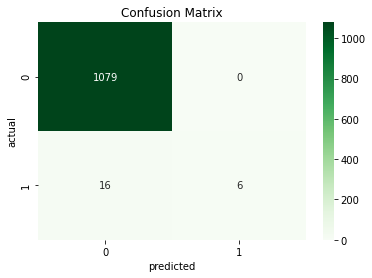

In [53]:
rf = RandomForestClassifier(max_depth=40, min_samples_split=4, n_estimators=500, n_jobs=-1, random_state=42)
rf.fit(X_train_all, y_train)
np.mean(cross_val_score(rf, X_test_all, y_test, scoring='recall',
                       n_jobs= -1, verbose=2, cv=20))
evaluation(y_test, rf.predict(X_test_all))

In [42]:
train = df.drop('flagged', axis=1)

#### Scaling and encoding entire dataset to resample with SMOTE to try and tackle the class imbalance

In [43]:
train_ohe = train[cat_features]
train_cont = train[cont_features]
train_index = train.index

ohe2 = OneHotEncoder()
ss2 = StandardScaler()

train_encoded = ohe2.fit_transform(train_ohe)
train_scaled = pd.DataFrame(ss2.fit_transform(train_cont), columns=train[cont_features].columns, index=train_index)

train_columns = ohe2.get_feature_names(input_features=train_ohe.columns)
train_processed = pd.DataFrame(train_encoded.todense(), columns = train_columns, index=train_index)

train_all = pd.concat([train_scaled, train_processed], axis=1)

In [44]:
train_all['flagged'] = df['flagged']

In [45]:
X_smote = train_all.drop('flagged', axis=1)
y_smote = train_all.flagged

smote = SMOTE(random_state=42, sampling_strategy='minority')

x_res, y_res = smote.fit_sample(X_smote, y_smote)

In [46]:
x_res.shape

(10312, 471)

In [47]:
y_res.value_counts()

1.0    5156
0.0    5156
Name: flagged, dtype: int64

In [48]:
X_t, X_val, y_t, y_val = train_test_split(x_res, y_res, random_state=42, test_size=.2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s


0.9990196078431373
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1041
         1.0       1.00      1.00      1.00      1022

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

Accurancy:  0.9995152690256908


[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


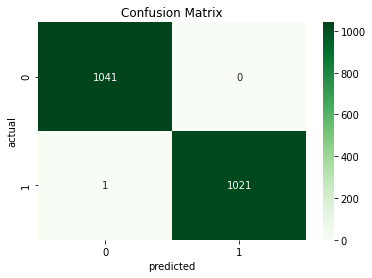

In [49]:
rf2 = RandomForestClassifier(max_depth=40, min_samples_split=4, 
                             n_estimators=500, n_jobs=-1, 
                             verbose=1, random_state=42)
rf2.fit(X_t, y_t)

print(np.mean(cross_val_score(rf2, X_val, y_val, scoring='recall',
                       n_jobs= -1, verbose=1, cv=20)))

evaluation(y_val, rf2.predict(X_val))

In [50]:
X_train

,sex,age,height,weight,team,noc,year,season,city,sport,event_x,medal,results
2298,M,22.0,262.5,81.0,Turkey,TUR,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",0,0.0
3614,F,27.0,258.0,90.0,Cyprus,CYP,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,0,0.0
4152,M,26.0,264.0,100.5,Mexico,MEX,2012,Summer,London,Athletics,Athletics Men's 20 kilometres Walk,0,0.0
3032,M,22.0,289.5,111.0,Canada,CAN,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,0,0.0
2819,F,30.0,247.5,72.0,Estonia,EST,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,M,35.0,279.0,165.0,Czech Republic,CZE,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Hammer Throw,0,0.0
3772,F,28.0,246.0,82.5,Poland,POL,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,0,0.0
5191,F,18.0,265.5,97.5,Switzerland,SUI,2012,Summer,London,Athletics,Athletics Women's 100 metres Hurdles,0,0.0
5226,M,25.0,267.0,96.0,Serbia,SRB,2012,Summer,London,Athletics,Athletics Men's Marathon,0,0.0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1079
         1.0       1.00      0.27      0.43        22

    accuracy                           0.99      1101
   macro avg       0.99      0.64      0.71      1101
weighted avg       0.99      0.99      0.98      1101

Accurancy:  0.9854677565849228


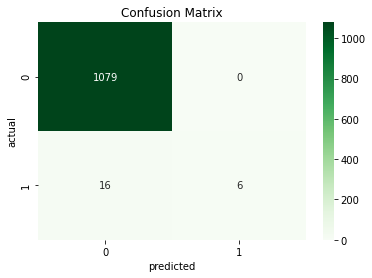

In [51]:
rf2.fit(X_train_all, y_train)
preds = rf2.predict(X_test_all)
evaluation(y_test, preds)

sex        0
age        0
height     0
weight     0
team       0
noc        0
year       0
season     0
city       0
sport      0
event_x    0
medal      0
flagged    0
results    0
dtype: int64

In [103]:
df.to_csv('df.csv',index=False)